In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv("C:/Users/anany/OneDrive/Downloads/Position_Salaries.csv")
 
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values
 
# Display dataset preview
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [2]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print("✅ Models Trained Successfully!")

✅ Models Trained Successfully!


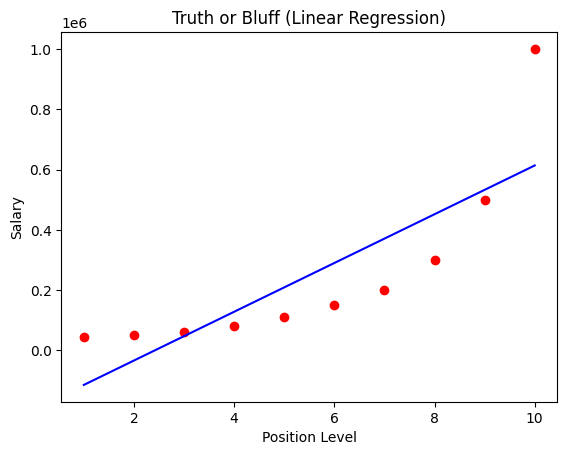

In [3]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

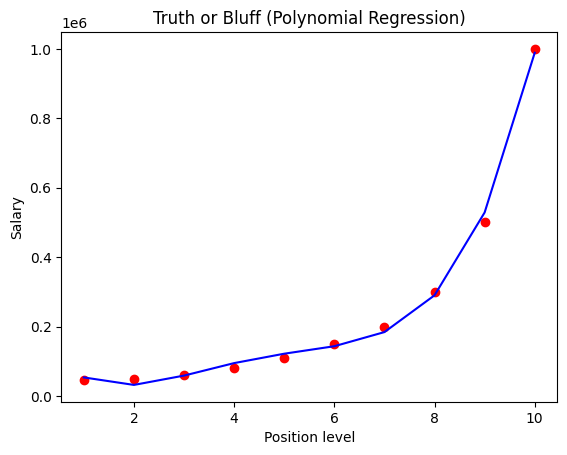

In [4]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\anany\AppData\Local\Temp\ipykernel_6724\3029784565.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


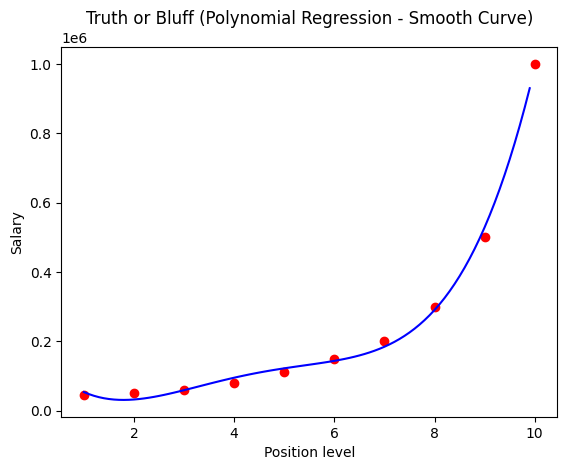

In [5]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [6]:
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)

Linear Regression Prediction for Level 6.5: [330378.78787879]


In [7]:
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)
 

Polynomial Regression Prediction for Level 6.5: [158862.45265155]


## Car Price Prediction

In [ ]:
# 1. Load the dataset and identify the relevant columns.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("C:/Users/anany/OneDrive/Downloads/CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
# 2. Use:
# Engine size as the input feature
# Car price as the output variable
X = df[["enginesize"]].values   # Input feature
y = df["price"].values          # Output variable



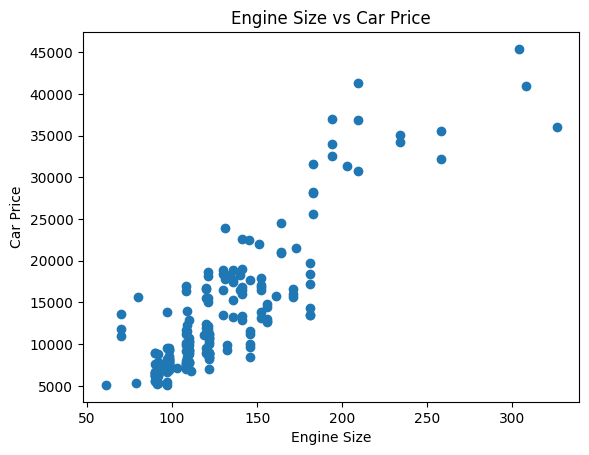

In [15]:
# 3. Visualize the relationship between engine size and price.
plt.figure()
plt.scatter(X, y)

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()



In [13]:
# 4. Build a predictive model to estimate car price based on engine size.
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# 5. Predict the price for a car with:
# Engine size = 200
engine_size_test = np.array([[200]])
engine_size_test_poly = poly.transform(engine_size_test)

predicted_price = model.predict(engine_size_test_poly)

print("Predicted price for engine size 200:", predicted_price[0])


Predicted price for engine size 200: 28207.45163684457


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

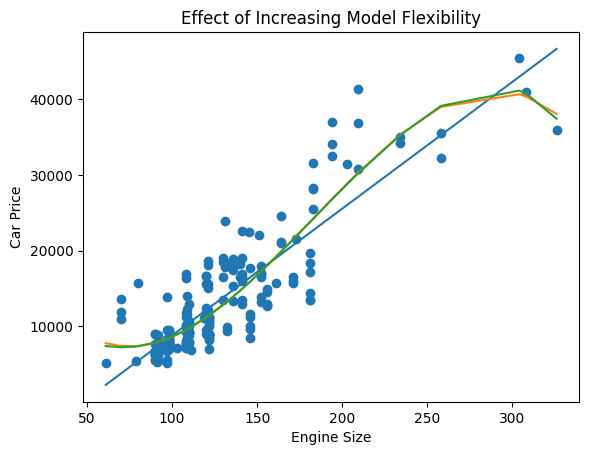

In [25]:
# 6. Increase the flexibility of your model and observe how the curve changes.
degrees = [1, 3, 6]  # increasing flexibility
X_sorted = np.sort(X, axis=0)

plt.figure()
plt.scatter(X, y)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_sorted_poly = poly.transform(X_sorted)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_curve = model.predict(X_sorted_poly)
    plt.plot(X_sorted, y_curve)

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Effect of Increasing Model Flexibility")
plt.show()



In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# -------------------
# Linear Model (Degree 1)
# -------------------
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)
train_pred_linear = linear_model.predict(X_train)

# R² Scores
r2_linear_train = linear_model.score(X_train, y_train)  # Train R²
r2_linear_test = linear_model.score(X_test, y_test)     # Test R²

# -------------------
# Polynomial Model (Degree 3)
# -------------------
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)
train_pred_poly = poly_model.predict(X_train_poly)

# R² Scores
r2_poly_train = poly_model.score(X_train_poly, y_train)  # Train R²
r2_poly_test = poly_model.score(X_test_poly, y_test)     # Test R²

# -------------------
# Print Results
# -------------------
print("LINEAR MODEL")
print("Train R²:", r2_linear_train)
print("Test R²: ", r2_linear_test)

print("\nPOLYNOMIAL MODEL (Degree 3)")
print("Train R²:", r2_poly_train)
print("Test R²: ", r2_poly_test)


LINEAR MODEL
Train R²: 0.7507055061579612
Test R²:  0.8040958796678975

POLYNOMIAL MODEL (Degree 3)
Train R²: 0.7730035936067178
Test R²:  0.8527894915205994


#### 8. Analyze which model:
captures the trend better

1. Curved (Polynomial) Model

gives more realistic predictions

1. Polynomial (degree 3)


In [31]:
# 9.Evaluate prediction errors and interpret them in business terms.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("LINEAR MODEL ERRORS")
print("MAE:", mae_linear)
print("RMSE:", rmse_linear)
print("R²:", r2_linear)

print("\nPOLYNOMIAL MODEL ERRORS")
print("MAE:", mae_poly)
print("RMSE:", rmse_poly)
print("R²:", r2_poly)

LINEAR MODEL ERRORS
MAE: 2748.6947032901094
RMSE: 3932.614774664367
R²: 0.8040958796678975

POLYNOMIAL MODEL ERRORS
MAE: 2348.8434416443756
RMSE: 3409.015907135493
R²: 0.8527894915205994


#### 10. Answer the following:
##### Why does a straight-line model fail here?

Linear model fails because price does not increase at a constant rate with engine size.


##### What risk occurs if the curve becomes too flexible?

Overfitting

1. Model learns noise instead of trend

2. Unrealistic spikes

3. Poor future predictions

##### Which model would you recommend for production and why?

Polynomial Regression (degree = 3)



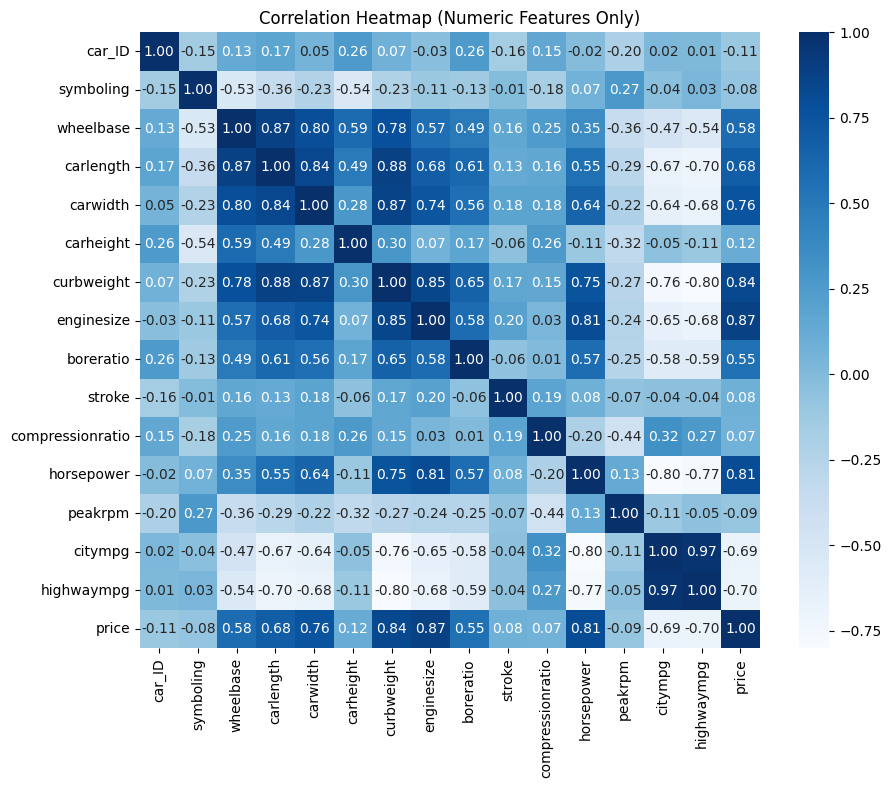

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Compute correlation matrix
corr_matrix = numeric_df.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


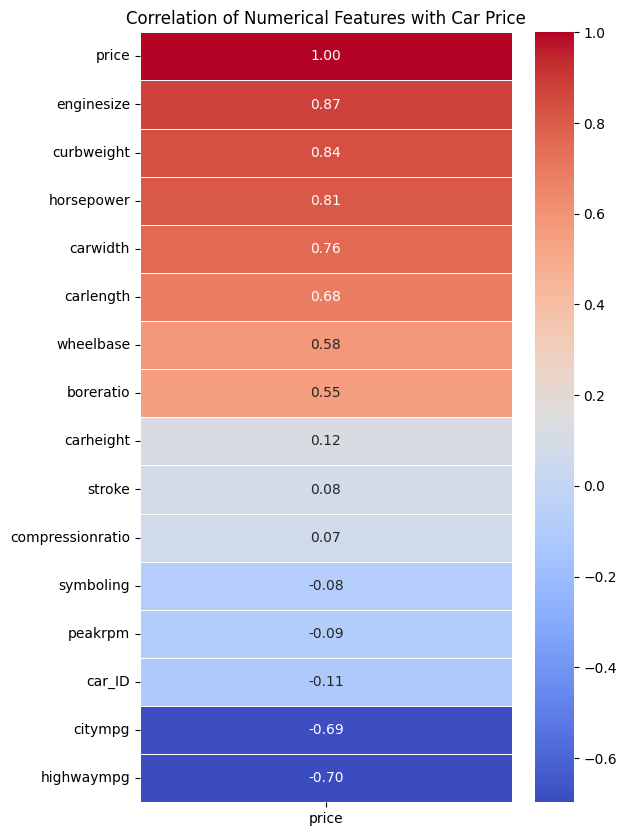

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])
price_corr = numeric_df.corr()[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(6, 10))
sns.heatmap(
    price_corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation of Numerical Features with Car Price")
plt.show()


### Relationship of Numerical Features with Price

enginesize → Strong positive 0.87

horsepower → Strong positive 0.81

curbweight → Strong positive 0.84

carwidth → Moderate positive 0.76

carlength → Moderate positive 0.68

wheelbase → Moderate positive 0.58

boreratio → Moderate positive 0.55

citympg → Moderate positive 0.69

highwaympg → Moderate positive 0.70

carheight → Weak positive 0.12

symboling → Weak positive 0.08

peakrpm → Weak positive 0.08

stroke → Weak positive 0.08

compressionratio → Weak positive 0.07

Insight:
Price is mainly influenced by engine and performance metrics, moderately by size, with minor effects from other features.

### Heatmap Insights

1. Strong positive: Engine size, horsepower, curb weight → higher price

2. Moderate positive: Wheelbase, car length, car width → moderately higher price

3. Negative: City mpg, highway mpg → more efficient cars cost less

4. Weak: Symboling, car height, stroke, compression ratio, peak rpm → little effect on price


In [47]:
np.abs(numeric_df.corr())

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,0.033930,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.011255,0.109093
symboling,0.151621,1.000000,0.531954,0.357612,0.232919,0.541038,0.227691,0.105790,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.034606,0.079978
wheelbase,0.129729,0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.544082,0.577816
carlength,0.170636,0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,0.287242,0.670909,0.704662,0.682920
carwidth,0.052387,0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.677218,0.759325
carheight,0.255960,0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358,0.119336
curbweight,0.071962,0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,0.266243,0.757414,0.797465,0.835305
enginesize,0.033930,0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,0.244660,0.653658,0.677470,0.874145
boreratio,0.260064,0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,0.055909,0.005197,0.573677,0.254976,0.584532,0.587012,0.553173
stroke,0.160824,0.008735,0.160959,0.129533,0.182942,0.055307,0.168790,0.203129,0.055909,1.000000,0.186110,0.080940,0.067964,0.042145,0.043931,0.079443


### varibles that have weak correlation(very close to zero)

#### weak Positive 

compressionratio → 0.07

stroke → 0.08

carheight → 0.12

#### weak neagtive

symboling → −0.08

peakrpm → −0.09

car_ID → −0.11


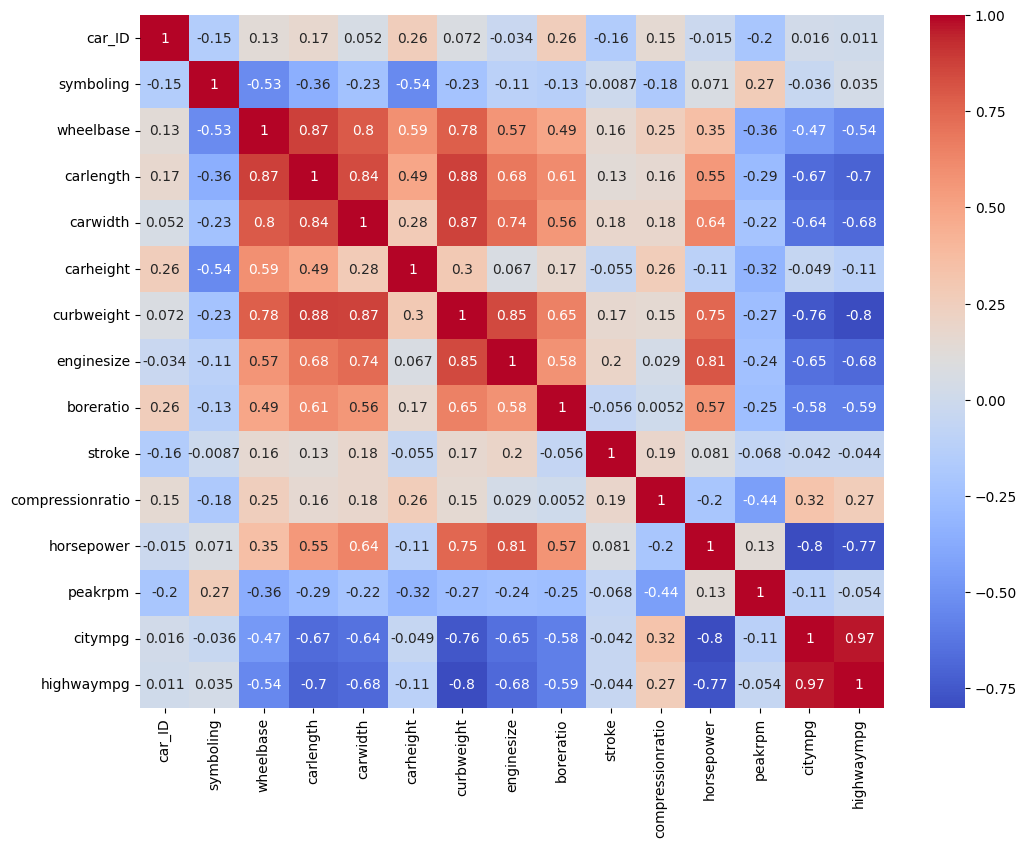

In [58]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

#### Features with correlation > 0.75:

wheelbase & carlength (0.87)

wheelbase & carwidth (0.80)

wheelbase & curbweight (0.78)

carlength & carwidth (0.84)

carlength & curbweight (0.88)

carwidth & curbweight (0.87)

curbweight & enginesize (0.85)

curbweight & horsepower (0.75)

enginesize & horsepower (0.81)

citympg & highwaympg (0.97)

horsepower & price (0.81)

curbweight & price (0.84)

enginesize & price (0.87)

carwidth & price (0.76)

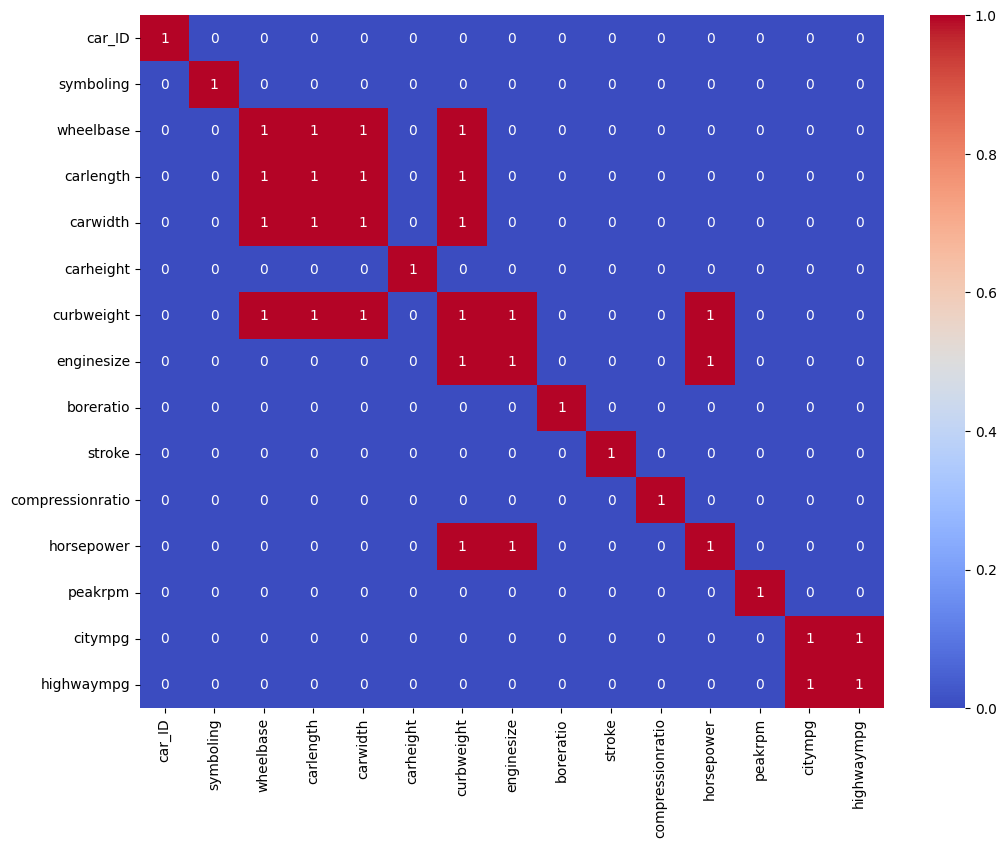

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

In [64]:
from sklearn.linear_model import Ridge, Lasso


In [68]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
print("Ridge Predictions:", ridge_model.predict(X_test))

# Lasso Regression
lasso_model = Lasso(alpha=1.0
                    )
lasso_model.fit(X_train, y_train)
print("Lasso Predictions:", lasso_model.predict(X_test))

Ridge Predictions: [26919.69720189 13983.86977967 12159.58642525 12325.43036656
 22607.75472782  8345.17577511 10501.14701215  8511.01971642
 10169.45912953  8345.17577511 14813.08948622  8511.01971642
 15476.46525146 12491.27430787 43338.24739163  7515.95606856
  2374.79388793 18129.96831243 12491.27430787 10169.45912953
 12491.27430787 22276.06684519  8345.17577511  7515.95606856
  7184.26818594 26919.69720189 16471.52889933 15642.30919277
  8345.17577511 15642.30919277 22607.75472782  7184.26818594
  7515.95606856 20949.31531471  8511.01971642 22607.75472782
 10169.45912953  3867.38935973  7184.26818594 18129.96831243
 10169.45912953]
Lasso Predictions: [26919.69777234 13983.86981134 12159.58638094 12325.43032916
 22607.75511867  8345.17557193 10501.14689876  8511.01952015
 10169.45900233  8345.17557193 14813.08955243  8511.01952015
 15476.4653453  12491.27427738 43338.24864591  7515.95583084
  2374.79343609 18129.96851679 12491.27427738 10169.45900233
 12491.27427738 22276.06722224

In [77]:
from sklearn.linear_model import RidgeCV
import numpy as np
model=RidgeCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))



Best alpha: 9.950000000000003
best score:  0.8040933847321597


In [78]:
from sklearn.linear_model import LassoCV
import numpy as np
model=LassoCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))



Best alpha: 9.950000000000003
best score:  0.8040934124003777


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/anany/OneDrive/Downloads/Bike_Rental_data(in).csv")


C:\Users\anany\AppData\Local\Temp\ipykernel_6724\1304842804.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/anany/OneDrive/Downloads/Bike_Rental_data(in).csv")
